In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from d2l import torch as d2l

## 2. Sigmoid Function
Hàm sigmoid (hay logistic function) là một hàm số liên tục, khả vi, cho đầu ra nằm trong khoảng (0, 1). Công thức thường gặp là:
 $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
Đặc điểm:
  - Đầu ra của hàm nằm trong khoảng (0,1). 
  - Đồ thị có dạng đường con hình chữ S, đầu ra tiến tới 0 khi x tiến tới -∞ và tiến tới 1 khi x tiến tới +∞, không zero-centered.
  - Dễ bị vanishing gradient khi |x| lớn.


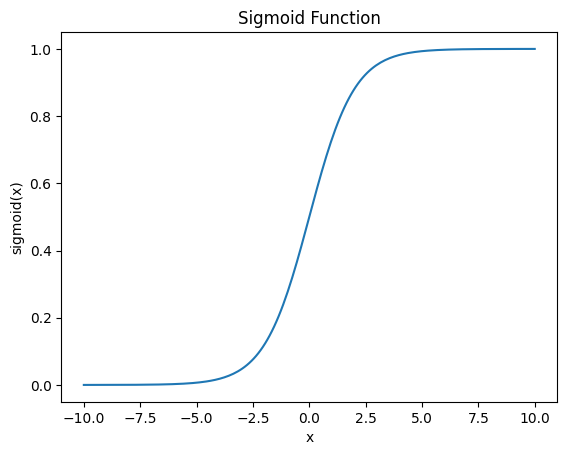

In [ ]:
x = torch.linspace(-10, 10, 200)
y = d2l.sigmoid(x)
plt.figure()
plt.plot(x.numpy(), y.numpy())
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

### Đạo hàm của hàm Sigmoid
Đạo hàm của hàm sigmoid được tính theo công thức:

$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$

Trong đó:
- $\sigma(x)$ là giá trị của hàm sigmoid tại $x$.
- $\sigma'(x)$ là đạo hàm của hàm sigmoid tại $x$.
- Đồ thị của đạo hàm hàm sigmoid có dạng hình chuông, đạt giá trị lớn nhất tại $x = 0$.
- Giá trị đạo hàm tiến dần về 0 khi $x$ tiến tới $-\infty$ hoặc $+\infty$.
- Đạo hàm của hàm sigmoid nhỏ khi giá trị $|x|$ lớn, dẫn đến hiện tượng vanishing gradient trong mạng nơ-ron sâu.
Đạo hàm này được sử dụng phổ biến trong các bài toán học sâu, đặc biệt là trong quá trình lan truyền ngược (backpropagation).

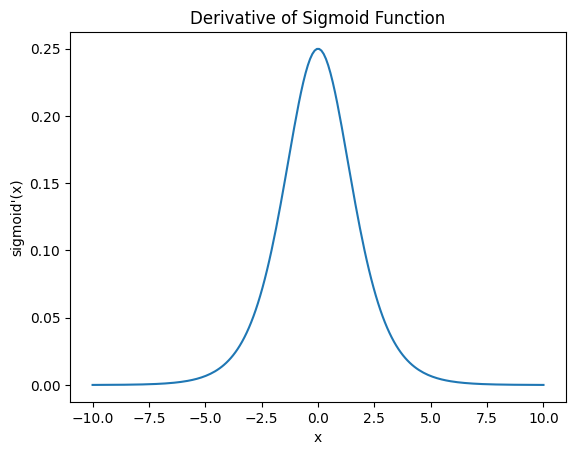

In [8]:
sigmoid_derivative = y * (1 - y)
plt.figure()
plt.plot(x.numpy(), sigmoid_derivative.numpy())
plt.title('Derivative of Sigmoid Function')
plt.xlabel('x')
plt.ylabel("sigmoid'(x)")
plt.show()

## 3. Tanh Function

- **Định nghĩa**: $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
- **Đặc điểm**:
  - Đầu ra của hàm nằm trong khoảng từ (-1, 1). 
  - Zero-centered, đối xứng qua gốc toạ độ. Khi x có giá trị gần bằng 0, hàm tanh sẽ tiến tới một phép biến đổi tuyến tính.
  - Vẫn có vanishing gradient nhưng ít hơn sigmoid


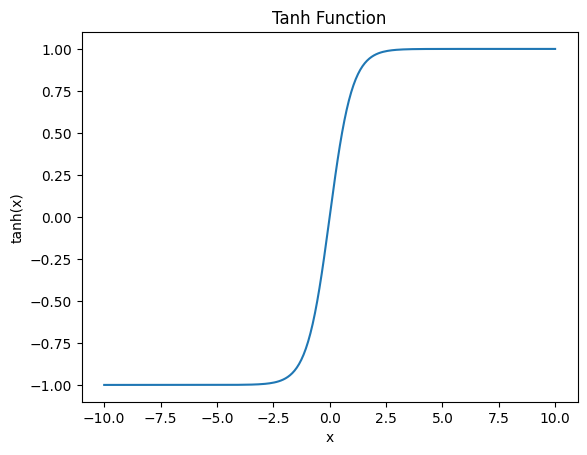

Tanh values: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])


In [ ]:
y = d2l.tanh(x)
plt.figure()
plt.plot(x.numpy(), y.numpy())
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.show()

print('Tanh values:', d2l.tanh(elements))

### Đạo hàm của hàm Tanh

Đạo hàm của hàm tanh được tính theo công thức:

$$\tanh'(x) = 1 - \tanh^2(x)$$

Trong đó:
- $\tanh(x)$ là giá trị của hàm tanh tại $x$.
- $\tanh'(x)$ là đạo hàm của hàm tanh tại $x$.

Đặc điểm:
- Đạo hàm của hàm tanh đạt giá trị lớn nhất tại $x = 0, khi đó output bằng 1
- Giá trị đạo hàm giảm dần khi $|x|$ tăng, dẫn đến hiện tượng vanishing gradient trong mạng nơ-ron sâu.
- Đạo hàm này thường được sử dụng trong các bài toán học sâu, đặc biệt là trong quá trình lan truyền ngược (backpropagation).

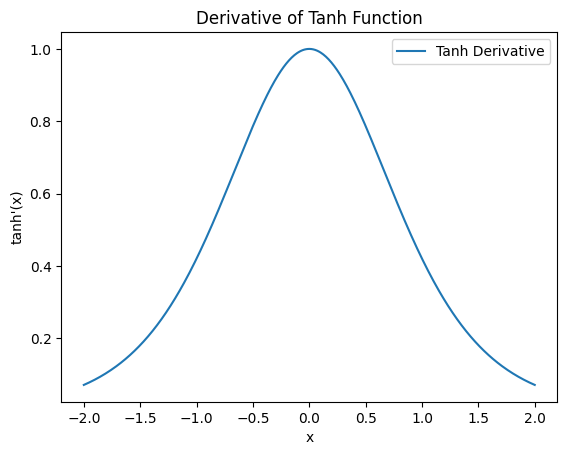

In [ ]:
elements_smooth = torch.linspace(-2, 2, 500)

tanh_values_smooth = d2l.tanh(elements_smooth)
tanh_derivative_values_smooth = 1 - tanh_values_smooth**2

plt.figure()
plt.plot(elements_smooth.numpy(), tanh_derivative_values_smooth.numpy(), label="Tanh Derivative")
plt.title("Derivative of Tanh Function")
plt.xlabel("x")
plt.ylabel("tanh'(x)")
plt.legend()
plt.show()

## So sánh và ứng dụng

Chúng ta có thể so sánh hàm tanh và sigmoid bằng cách làm exercises số 5 .Hàm Sigmoid và hàm tanh rất giống nhau. Chứng minh rằng $$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$$.
### Chứng minh:  
Định nghĩa của $\operatorname{tanh}(x)$ và $\operatorname{sigmoid}(x)$:  
        $$\operatorname{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}, \quad \operatorname{sigmoid}(x) = \frac{1}{1 + e^{-x}}.$$  
        Thay $\operatorname{sigmoid}(2x)$ vào vế phải phương trình:  
        $$2 \cdot \operatorname{sigmoid}(2x) = \frac{2}{1 + e^{-2x}}.$$  
        Thay $\operatorname{tanh}(x)$ vào vế trái phương trình:  
        $$\operatorname{tanh}(x) + 1 = \frac{e^x - e^{-x}}{e^x + e^{-x}} + 1.$$  
        Biến đổi vế trái:  
        $$\operatorname{tanh}(x) + 1 = \frac{e^x - e^{-x} + e^x + e^{-x}}{e^x + e^{-x}} = \frac{2e^x}{e^x + e^{-x}}.$$  
        Nhận thấy rằng $\frac{2e^x}{e^x + e^{-x}}$ tương đương với $\frac{2}{1 + e^{-2x}}$.  
        Do đó,  
        $$\operatorname{tanh}(x) + 1 = 2 \cdot \operatorname{sigmoid}(2x).$$


In [ ]:
# tanh(x) + 1
x = d2l.tanh(x) + 1

# 2 * sigmoid(2x)
y = 2 * d2l.sigmoid(2 * x)

# Dùng hàm torch.allclose để kiểm tra xem x và y có chênh lệch tuyệt đối nhỏ hơn ngưỡng quy định hay không.
is_equal = torch.allclose(x, y, atol=1e-6)

# Print the result
print("Tanh(x) + 1:", x)
print("2 * Sigmoid(2x):", y)
print("Hai vế có bằng nahu không?", is_equal)

Tanh(x) + 1: tensor([1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612, 1.9612,
        1.9612, 1.9612, 1.9

## 3. Summary
- Chúng ta đều đã thấy được vai trò của hàm phi tuyến trong mạng MLP dùng để kích hoạt và tăng khả năng biểu diễn mô hình so với mạng chỉ sử dụng thuần các hàm tuyến tính.
- Thấy được đặc điểm của ba loại hàm phi tuyến ReLu, Sigmoid và Tanh.


<div align="center">

| Đặc điểm                   | **ReLU**                         | **Sigmoid**                        | **Tanh**                                       |
|:---------------------------|:--------------------------------:|:----------------------------------:|:----------------------------------------------:|
| Định nghĩa                 | $\max(0, x)$                     | $\sigma(x) = \frac{1}{1 + e^{-x}}$ | $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ |
| Phạm vi giá trị            | $[0, \infty)$                    | $(0, 1)$                           | $(-1, 1)$                                      |
| Phi tuyến                  | Có                               | Có                                 | Có                                             |
| Đạo hàm                    | $1$ nếu $x > 0$; $0$ nếu $x < 0$ | $\sigma(x)\,(1 - \sigma(x))$       | $1 - \tanh^2(x)$                               |
| Tính đơn giản              | Rất đơn giản                     | Phức tạp hơn do mũ                 | Tương đối phức tạp                             |
| Hiện tượng gradient vanish | Không (khi $x > 0$)              | Có                                 | Có                                             |
| Tính thưa (sparsity)       | Có (nhiều output bằng 0)         | Không                              | Không                                          |
| Tính tuyến tính theo đoạn  | Có                               | Không                              | Không                                          |

</div>


- **Chọn hàm**:
  - Sigmoid: thích hợp cho đầu ra phân loại nhị phân (xác suất).
  - Tanh: đầu ra zero-centered, thường dùng ở các lớp hidden kiểu mạng nhỏ.
- Trong các mạng sâu hiện đại, thường ưu tiên ReLU và biến thể để giảm thiểu vanishing gradient.

## Exercises
### 1. Show that adding layers to a linear deep network cannot increase expressive power. Give an example where it reduces it.

Chứng minh việc thêm lớp vào mạng tuyến tính không tăng năng lực biểu diễn

Trong mạng nơ-ron, mỗi lớp tuyến tính có dạng:

$$f(\mathbf{x}) = W\mathbf{x} + \mathbf{b}$$

Nếu ta xếp chồng hai lớp tuyến tính liên tiếp (không có hàm kích hoạt phi tuyến), ta có:

$$
\begin{aligned}
f_1(\mathbf{x}) &= W_1 \mathbf{x} + \mathbf{b}_1,\\
f_2(\mathbf{z}) &= W_2 \mathbf{z} + \mathbf{b}_2,
\end{aligned}
$$

với $\mathbf{z} = f_1(\mathbf{x})$. Khi đó:

 $$
 f_2(f_1(\mathbf{x}))
 = W_2 (W_1 \mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2
 = (W_2 W_1)\,\mathbf{x} \;+\; (W_2\mathbf{b}_1 + \mathbf{b}_2).
$$

Như vậy, ta có thể thấy khi có hai lớp tuyến tính liên tiếp ta có thể biểu diễn tương đương chỉ bằng một lớp tuyến tính với
ma trận trọng số $W = W_2 W_1$ và vector bias $\mathbf{b} = W_2\mathbf{b}_1 + \mathbf{b}_2$.

 **Kết luận:** Mạng sâu chỉ gồm các lớp tuyến tính (không có hàm kích hoạt phi tuyến) hoàn toàn tương đương với một tầng tuyến tính duy nhất, nên độ sâu không tăng năng lực biểu diễn.

Một ví dụ đơn giản chứng minh cho kết luận trên:

Xét mạng sâu gồm hai lớp tuyến tính:

$$
 \begin{aligned}
 z &= w_1 x + b_1,\\
 y_{\mathrm{deep}} &= w_2\,z + b_2.
 \end{aligned}
 $$

 Chúng ta chọn các tham số:
 $$
 w_1 = 2,\quad b_1 = 1,\quad
 w_2 = 3,\quad b_2 = 4,\quad
 x = 5.
 $$

Thay số vào công thức:
 
 $$
 z = w_1 x + b_1 = 2 \times 5 + 1 = 11.
 $$
 
 $$
 y_{\mathrm{deep}} = w_2\,z + b_2 = 3 \times 11 + 4 = 33 + 4 = 37.
 $$

 Giờ chúng ta ghép hai lớp thành một lớp duy nhất:
 $$
 \begin{aligned}
 w_{\mathrm{eff}} &= w_2\,w_1 = 3 \times 2 = 6,\\
 b_{\mathrm{eff}} &= w_2\,b_1 + b_2 = 3 \times 1 + 4 = 7.
 \end{aligned}
 $$

 Khi đó:
 $$
 y_{\mathrm{shallow}} = w_{\mathrm{eff}}\,x + b_{\mathrm{eff}}
 = 6 \times 5 + 7 = 30 + 7 = 37.
 $$

 Ta thấy 
 $$
 y_{\mathrm{deep}} = y_{\mathrm{shallow}} = 37,
 $$
chứng tỏ hai lớp tuyến tính hoàn toàn tương đương với một lớp tuyến tính hợp nhất.

In [48]:
import numpy as np

w1, b1 = 2, 1
w2, b2 = 3, 4
x = 5

# Mạng sâu: hai lớp tuyến tính
z = w1 * x + b1
y_deep = w2 * z + b2

# Mạng nông: một lớp hiệu dụng
w_eff = w2 * w1
b_eff = w2 * b1 + b2
y_shallow = w_eff * x + b_eff

print("y_deep    =", y_deep)      # 37
print("y_shallow =", y_shallow)   # 37


y_deep    = 37
y_shallow = 37


Tiếp theo ta sẽ chứng minh khi thêm nhiều lớp tuyến tính vào thì khả năng biểu diễn của mạng có thể suy giảm.

Ví dụ giảm năng lực biểu diễn khi có bottleneck

Xét mạng tuyến tính sâu với kích thước:
- Input dimension: 3
- Hidden dimension: 2
- Output dimension: 3

Ma trận trọng số:
 $$W_1\in\mathbb{R}^{2\times 3},\quad W_2\in\mathbb{R}^{3\times 2}.$$

 Ma trận hiệu dụng $W_{\rm eff} = W_2\,W_1$ có kích thước $3\times 3$, nhưng
 $$\mathrm{rank}(W_{\rm eff})\le \min(\mathrm{rank}(W_2),\,\mathrm{rank}(W_1))
 \le 2.$$

 Trong khi đó, một lớp tuyến tính 3×3 duy nhất có thể đạt rank lên đến 3. Như vậy,
 mạng sâu với bottleneck 2 chiều chỉ có thể biểu diễn các ánh xạ tuyến tính có
 rank tối đa bằng 2, kém hơn mạng nông 3×3 (có thể đạt rank 3).

 Như vậy, việc thêm lớp tuyến tính với bottleneck (ẩn nhỏ hơn cả đầu vào và đầu ra) có thể dẫn đến sự suy giảm khả năng biểu diễn của mô hình.

 Bên dưới là ví dụ minh hoạ bằng python.


In [53]:
# Khởi tạo W1 (2x3) và W2 (3x2) và W0_normal (3x3)
W0_normal = np.random.randn(3, 3)
W1_bottle = np.random.randn(2, 3)
W2_bottle = np.random.randn(3, 2)

# Tính ma trận hiệu dụng và rank
W_eff_bottle = W2_bottle @ W1_bottle
rank_eff = np.linalg.matrix_rank(W_eff_bottle)
rank_normal = np.linalg.matrix_rank(W0_normal)

print("Kích thước ma trận hiệu dụng bị bottle neck:", W_eff_bottle.shape)
print("Rank của ma trận hiệu dụng bị bottle neck:", rank_eff, "(≤ 2)")

print("Kích thước ma trận normal không bị bottle neck:", W0_normal.shape)
print("Rank của ma trận normal không bị bottle neck:", rank_normal, "(≤ 3)")


Kích thước ma trận hiệu dụng bị bottle neck: (3, 3)
Rank của ma trận hiệu dụng bị bottle neck: 2 (≤ 2)
Kích thước ma trận normal không bị bottle neck: (3, 3)
Rank của ma trận normal không bị bottle neck: 3 (≤ 3)


### 3. Compute the derivative of the Swish activation function 

Đạo hàm của hàm Swish

**Định nghĩa**  
Hàm Swish được định nghĩa là  
$$
f(x) = x \,\sigma(\beta x),
$$  
trong đó  $\sigma(x) = \frac{1}{1 + e^{-x}}$ là hàm Sigmoid, và $\quad \beta \in \mathbb{R}$ là tham số điều chỉnh độ dốc của hàm sigmoid.

**Đặc tính**:  
  - Hàm Swish có đầu ra mượt mà và liên tục, giúp giảm hiện tượng vanishing gradient so với hàm sigmoid.  
  - Khi $\beta = 1$, Swish trở thành một hàm phi tuyến phổ biến với khả năng biểu diễn tốt hơn trong các mạng nơ-ron sâu.  
  - Khi $\beta \to 0$, Swish tiến gần đến hàm tuyến tính $f(x) = x$.  
  - Khi $\beta \to \infty$, Swish tiến gần đến hàm ReLU.  
  - Swish thường được sử dụng trong các mô hình học sâu hiện đại nhờ tính năng học linh hoạt và hiệu quả.  
  
**Tính đạo hàm**  
Để tính đạo hàm của hàm Swish, ta sẽ sử dụng quy tắc sản phẩm và đạo hàm của hàm sigmoid. 
$$
f'(x) \;=\; \frac{d}{dx}[\,x\,]\;\sigma(\beta x)\;+\;x\;\frac{d}{dx}\bigl[\sigma(\beta x)\bigr].
$$  
- Vì $\frac{d}{dx}x = 1.$,  
- Và với $\sigma(u)$, ta có  
  $$
  \sigma'(u) = \sigma(u)\,\bigl(1 - \sigma(u)\bigr).
  $$  
  Suy ra  
  $$
  \frac{d}{dx}\bigl[\sigma(\beta x)\bigr]
  = \sigma'(\beta x)\,\frac{d}{dx}[\beta x]
  = \beta\,\sigma(\beta x)\,\bigl(1 - \sigma(\beta x)\bigr).
  $$  

Thay vào, ta được  
$$
f'(x)
= \sigma(\beta x)
+ x \,\beta\,\sigma(\beta x)\,\bigl(1 - \sigma(\beta x)\bigr).
$$

**Kết luận**  
Đạo hàm của hàm Swish có thể viết gọn là  
$$
\boxed{\,f'(x) = \sigma(\beta x)
+ \beta\,x\,\sigma(\beta x)\bigl(1 - \sigma(\beta x)\bigr)\,}.
$$

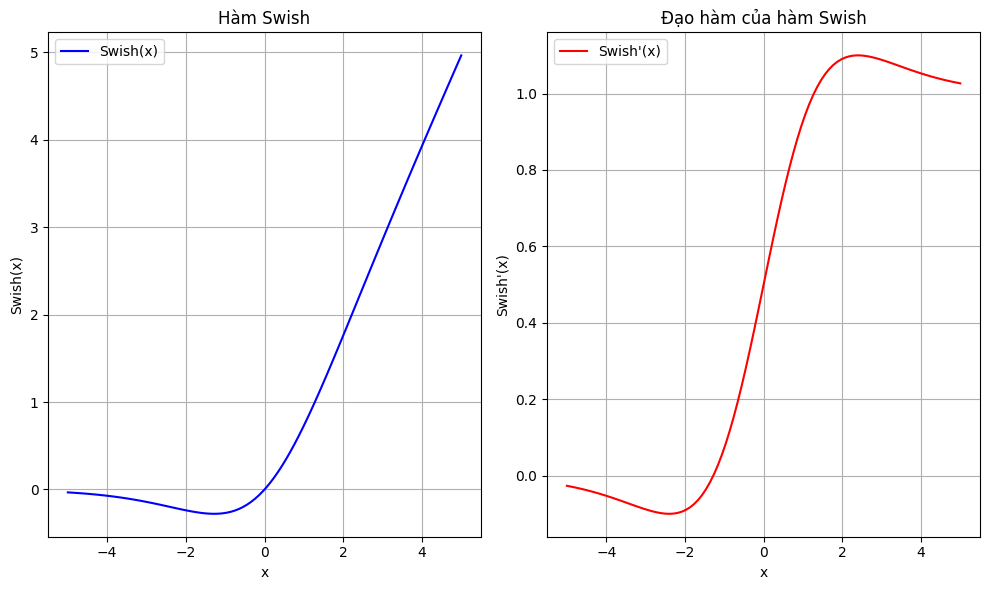

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hàm Swish và đạo hàm của Swish
def swish(x, beta):
    return x * sigmoid(beta * x)

def swish_derivative(x, beta):
    sig = sigmoid(beta * x)
    return sig + x * beta * sig * (1 - sig)

# Tạo các giá trị x từ -5 đến 5
x = np.linspace(-5, 5, 100)
beta = 1  # Tham số beta

# Tính giá trị của Swish và đạo hàm của Swish
y = swish(x, beta)
y_prime = swish_derivative(x, beta)

# Vẽ đồ thị của Swish và đạo hàm của nó
plt.figure(figsize=(10, 6))

# Đồ thị của hàm Swish
plt.subplot(1, 2, 1)
plt.plot(x, y, label="Swish(x)", color='blue')
plt.title("Hàm Swish")
plt.xlabel("x")
plt.ylabel("Swish(x)")
plt.grid(True)
plt.legend()

# Đồ thị của đạo hàm hàm Swish
plt.subplot(1, 2, 2)
plt.plot(x, y_prime, label="Swish'(x)", color='red')
plt.title("Đạo hàm của hàm Swish")
plt.xlabel("x")
plt.ylabel("Swish'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
